
Clustered Data:
   Salary  Cluster
1   475.0        1
2   480.0        1
3   500.0        1
4    91.5        1
5   750.0        2


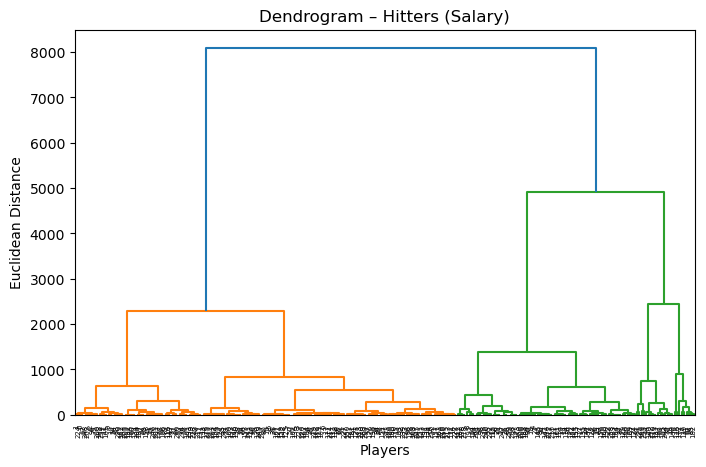

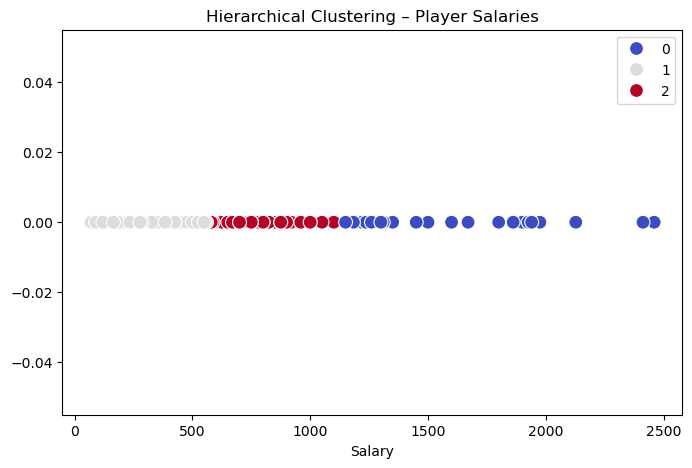

In [1]:
# Hierarchical Clustering – Hitters.csv
# Feature: Salary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("Hitters.csv")

# Handle categorical values
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Remove rows with missing salaries
df = df.dropna(subset=["Salary"])

X = df[["Salary"]]

# -----------------------------
# Apply Hierarchical Clustering
# -----------------------------
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["Cluster"] = hc.fit_predict(X)

print("\nClustered Data:")
print(df[["Salary", "Cluster"]].head())

# -----------------------------
# Dendrogram
# -----------------------------
plt.figure(figsize=(8, 5))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title("Dendrogram – Hitters (Salary)")
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()

# -----------------------------
# Scatter Plot
# -----------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Salary", y=[0]*len(df), hue="Cluster", data=df, palette="coolwarm", s=100)
plt.title("Hierarchical Clustering – Player Salaries")
plt.xlabel("Salary")
plt.legend()
plt.show()
